## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Loading in Data

In [3]:
til = pd.read_csv('../data/todayilearned.csv')
stil = pd.read_csv('../data/shittytodayilearned.csv')

In [4]:
til['words'] = til['title'].str.split().str.len()
stil['words'] = stil['title'].str.split().str.len()

I know I will want to look at words of the posts, so making a new column for it now

# Cleaning r/STIL

In [5]:
stil.shape

(7862, 5)

In [6]:
stil.head()

,title,created_utc,score,subreddit,words
0,TIL there is deadass a subreddit called r/poop,1639505768,1,ShittyTodayILearned,8
1,"TIL that u/rolcck's display name is ""Tony""",1639205931,1,ShittyTodayILearned,7
2,"TIL that when he was 10, Snoop Dogg won 1st prize in the annual California All-Wide Science Fair with his exhibit: ""The Effects Of Marijuana On Me""",1639115474,1,ShittyTodayILearned,27
3,TIL the existence of COVID-19 is just evidence that bats are evil and should be eradicated,1639112937,1,ShittyTodayILearned,16
4,"TIL that when a British person brags that they have a two thousand pound laptop, they mean price, not weight.",1639111835,1,ShittyTodayILearned,20


In [7]:
stil.tail()

,title,created_utc,score,subreddit,words
7857,"TIL black people came from Africa, but they got tired of the heat, and decided to take cruise ships to America",1327125514,33,ShittyTodayILearned,21
7858,TIL there are other websites besides reddit,1327125508,16,ShittyTodayILearned,7
7859,TIL what TIL means,1327123907,3,ShittyTodayILearned,4
7860,TIL Fish can't actually breath under water - they have to surface for oxygen every 2-3 minutes,1327117923,11,ShittyTodayILearned,17
7861,TIL that Hitler was apart of a traveling boy band.,1327109902,19,ShittyTodayILearned,10


In [8]:
stil.isnull().sum()

title          0
created_utc    0
score          0
subreddit      0
words          0
dtype: int64

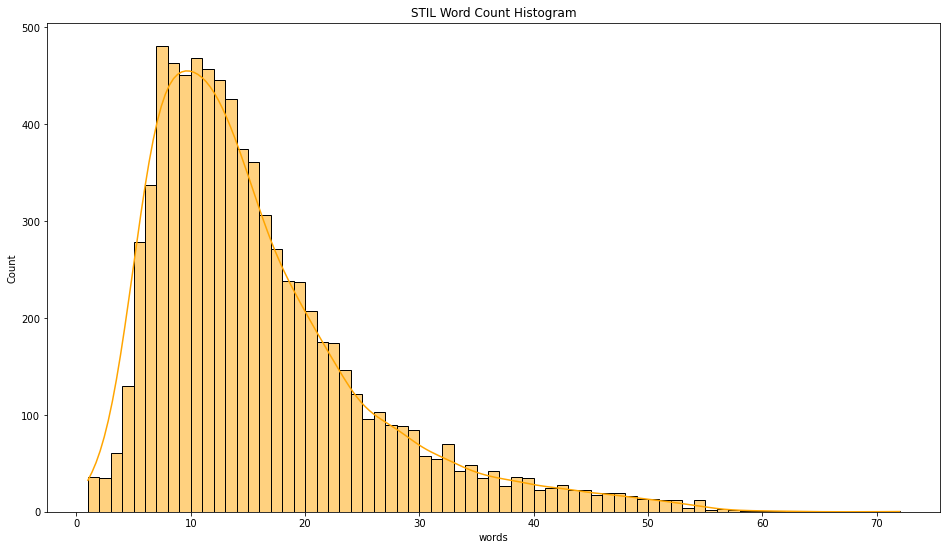

In [9]:
plt.figure(figsize = (16,9))

sns.histplot(data = stil,
    x = 'words',
    kde = True,
    binwidth = 1,
    color = 'orange'
   ).set(title = 'STIL Word Count Histogram');

Checking word count distribution. Normal distribrution, skews right. Will now want to check the extreme values.

In [10]:
stil[stil['words'] == 9]['title']

17                                                                                                                                                                                                                                                                            TIL I forgot what I came here to post
41                                                                                                                                                                                                                                                                   TIL that breaking the law makes you a criminal
58                                                                                                                                                                                                                                               Today I learned that DMX's birthname is "Deoxyribo-Methylfolate X"
94                                                                          

These posts seem good for the model

In [11]:
stil[stil['words'] == 8]['title']

0                                  TIL there is deadass a subreddit called r/poop
53                                    TIL that steel wool comes from robot sheep.
57                                          A chicken's egg comes out of its butt
62                                     TIL Bob Dole 1996 website is still online.
65                                 TIL that "TIL" stands for "laughing out loud".
73                                         TIL November 5th is This Guy Fucks Day
89                               TIL eating car batteries mostly cause no problem
161                                      50% of africans are half of all africans
220                                 TIL that Americans even deep fry their voice.
267                                   TIL the letter O looks the same upside-down
357                                    Today I learned the Beastie Boys are black
397                               TIL Asiatic asses are bigger than African asses
401             

The majority of these still look good.

In [12]:
stil[stil['words'] == 7]['title']

1                                   TIL that u/rolcck's display name is "Tony"
9                                     TIL rubber is not a tree's.......mmm nvm
12                                 TIL that non american people have feelings.
52                                 TIL that lava is manufactured in lavatories
64                                          TIL that Mom found the piss drawer
84                               TIL that fascinators are not very fascinating
101                                TIL... Mike Myers is *not* Michael Myers!!!
131                                    TIL that Interstellar was shot on Earth
167                                           TIL pop tarts have water in them
188                                       TIL That cucumbers can be eaten too.
257                                       TIL adult diapers are for babies too
266                                                  TIL R Kelly was on the DL
281                                 TIL There is a f

Some of these are starting to look not disreable, but too much good data would be lsot culling all of these

In [13]:
stil[stil['words'] == 6]['title']

117                                  TIL that she's actually a dude
155                              TIL there's a company named Covid.
248                  TIL "synchronized swimming" is fucking stupid.
344                       TIL hippety hoppety makes cheese sharpety
363                                         TIL what THE FUCK is up
369                                    TIL that "Gay Pride" is gay.
432                           TIL that eating plants causes cancer.
593                       TIL that lttstore.com sells water bottles
711                                 TIL what blue balls feels like.
772                               TIL that most turkeys are Muslim.
778                                   "Rock out with your cock out"
851                            A Personality Quiz Backed By Science
874                                         TIL how to tie my shoes
920                                  TIL They have ferns in Ireland
946                         TIL reddit admins ar

The majority of these are not good. I'm ok with dropping these and lower

In [15]:
stil['words'].value_counts()

7     481
10    468
8     463
11    457
9     451
12    446
13    426
14    375
15    361
6     337
16    306
5     279
17    271
18    238
19    237
20    207
21    175
22    174
23    146
4     130
24    122
26    103
25     96
27     90
28     89
29     84
32     70
3      61
30     58
31     55
34     48
36     42
33     42
38     36
1      36
39     35
2      35
35     35
42     28
37     27
41     25
43     23
44     22
40     22
46     19
47     19
45     17
48     16
50     13
49     13
54     12
51     12
52     12
53      4
56      3
57      2
55      2
59      1
61      1
58      1
72      1
60      1
63      1
Name: words, dtype: int64

Double checking value counts before dropping all posts 6 words or less

In [16]:
stil = stil[stil['words'] > 6]

In [17]:
stil.shape

(6984, 5)

In [18]:
stil[stil['words'] > 50]['title']

175                    TIL That Lamborghini used to be a tractor company, so if you buy a tractor today and wait for a couple decades, it will evolve into a sports car under the right environment. Some creationists including my parents tried conveying me that it won't work but I'll show them in 40-50 years.
206                  TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD. TIL I have OCD.
209          In Ice Age (2002): Manny tells Sid that he can't breathe because Sid is standing on his trunk. At this point, Sid instantly removes his foot from Manny's trunk. This is a reference to what you're supposed to do when someone tells you they can't breathe because you're standing on their windpipe.
299     TIL there are 4 simultaneous 24hr days in a 4-corner rotation of 

Although the majority of these posts are very odd, I think they will do well for classification

In [19]:
discard = ['reddit', 'subreddit', 'mod ', 'mod.', 'mod,', 'mods ', 'mods.', 'mods,', 'moderator', 'username', 'r/', 'u/']

stil = stil[~stil.title.str.lower().str.contains('|'.join(discard))]

#source: https://www.statology.org/pandas-drop-rows-that-contain-string/

r/TIL makes sure no posts references Reddit, while a sizable amount of r/STIL are joke posts about Reddit and will make it artificially easier to classify between subreddits. Although this removal will likely lower our models' accuracy, I am more interested in making classifiers that differentiate between the more difficult posts.

In [20]:
stil.shape

(6662, 5)

In [21]:
stil.drop_duplicates(subset = "title",
                     keep = False, inplace = True)

Whether a user double posted their content, or the scraper picked up some data multiple times, these posts only add noise to the model and should be dropped.

In [22]:
stil.to_csv('../data/stil_clean.csv', index = False)

Saving Progress

# Cleaning r/TIL

In [23]:
til.tail()

,title,created_utc,removed_by_category,score,subreddit,words
124918,"TIL of Koko the Gorilla. She knew 2,000 words of spoken English and could form 1,000 different signs of Gorilla Sign Language. One day she told her mentor that she wanted to be a mother, so she gave her a kitten who Koko named. After it died, Koko expressed grief.",1601826485,NaN,1,todayilearned,50
124919,That it took 4.5 years to recover 99% of data from a very old hard disk drive found in a dry lakebed after it fell from the sky upon Columbia’s 2003 fated re-entry. It had lain in the lake for 6 months till the lake dried up and the drive was found and sent to a data recovery team,1601826319,moderator,1,todayilearned,59
124920,"TIL Bach wrote a miniature comedic cantata about addiction to coffee. It features scenes such as- a love song to coffee, a father requests his daughter to give up coffee, and all three characters in the finale singing the moral of the story, ""drinking coffee is natural.""",1601825976,automod_filtered,1,todayilearned,47
124921,"TIL that in 2004, Colorado welder Marvin Heemeyer built a homemade tank with one-foot-thick armor and multiple guns and went on a rampage in his local town, demolishing the businesses of people who had wronged him for hours as local police and SWAT were unable to stop his ""kill-dozer.""",1601825359,automod_filtered,1,todayilearned,49
124922,"TIL that in 2003, outspoken atheist Christopher Hitchens was asked by the Catholic Church to literally play the Devil's advocate and argue against Mother Teresa being declared a saint. Hitchens failed to convince the Church that Teresa was a fraud and that her miracles were fabrications.",1601824978,NaN,1,todayilearned,46


In [24]:
til.isnull().sum()

title                      0
created_utc                0
removed_by_category    58184
score                      0
subreddit                  0
words                      0
dtype: int64

The nulls refers to posts that were not removed. Let's temporarily give them a more apt name so it looks better for a graph

In [25]:
til.fillna('not_removed', inplace = True)

In [26]:
til['removed_by_category'].value_counts()

not_removed         58184
moderator           52533
automod_filtered     6636
deleted              4991
reddit               2578
content_takedown        1
Name: removed_by_category, dtype: int64

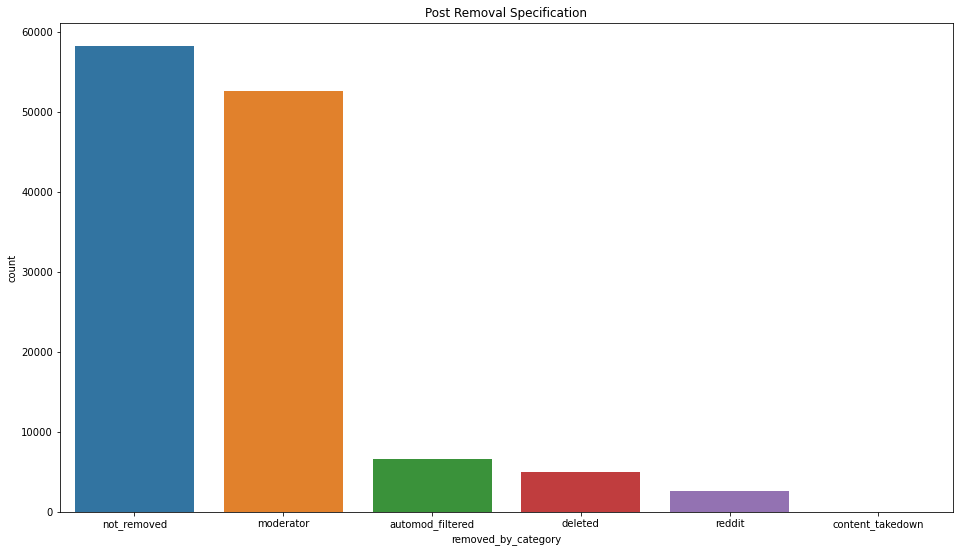

In [27]:
plt.figure(figsize = (16,9))

sns.countplot(x='removed_by_category', 
              data = til,
             order = til['removed_by_category'].value_counts().index
             ).set(title = 'Post Removal Specification');

plt.savefig('../images/removal')

In [28]:
til = til[til['removed_by_category'] == 'not_removed']

Posts are removed from r/TIL when they don't meet the subreddit's standards. I do not think these posts will be a good representation for classifying

In [29]:
til.drop(['removed_by_category'], axis = 1, inplace = True)

Drop the column as it no longer serves a purpose.

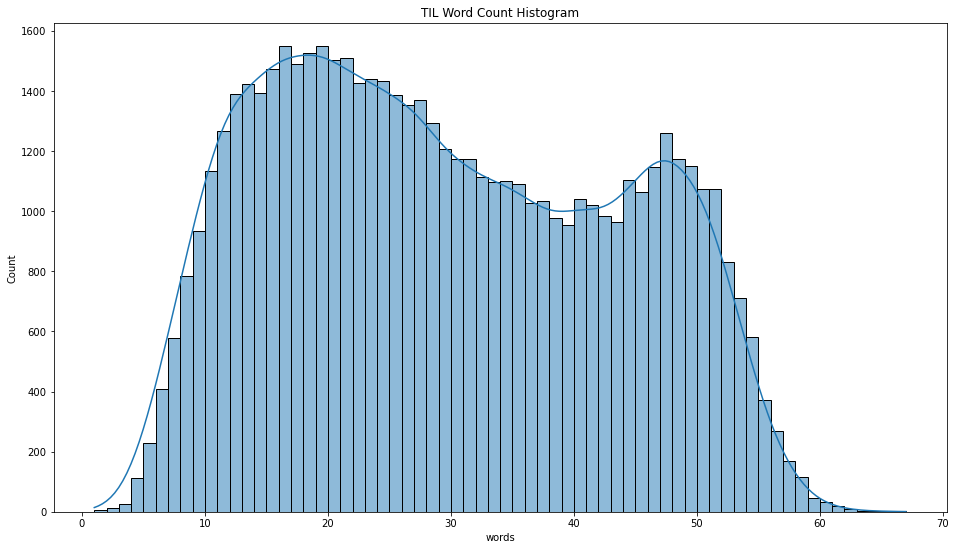

In [30]:
plt.figure(figsize = (16,9))

sns.histplot(data = til,
    x = 'words',
    kde = True,
    binwidth = 1    
   ).set(title = 'TIL Word Count Histogram');

Oddly shaped word distribution, showing posts tend toward being lengthy and descriptive at ~50 words, or a bit more brisk at ~20 words. Let's look at extremes again

In [31]:
til[til['words'] == 7]['title']

61                                                 TIL two-person, sidecar go-karts are a thing.
110                                                     TIL the Jeopardy theme music has lyrics.
127                                                TIL Human-sized penguins lived in New Zealand
178                                                             TIL Gotham City is in New Jersey
222                                                         TIL birds don't sleep in their nests
392                                                   TIL that sand dollars are living creatures
1161                                                 TIL Wisconsin has more lakes than Minnesota
1620                                                     Today I learned Cat's can't drink milk!
1672                                                   TIL that Pfizer has a suspicious history.
2332                                                         TIL Earth can make its own auroras.
2614                          

Feel the same as I did with r/STIL

In [32]:
til[til['words'] == 6]['title']

12                                  TIL … Of Course It’s Australia
269                              TIL snipers wipe each other's ass
911                           TIL New Zealand sorta banned smoking
1214                      TIL Obese people are often malnourished.
1471                  TIL about ODD oppositional defiant disorder.
2229              TIL Vacuum cleaners were originally horse-drawn.
2870            TIL Australians nickname the Cyclone "Willy-Willy"
3186                           TIL: Its Raining Diamonds In Uranus
3456                            TIL about wicked and tame problems
4142                         TIL Polar Bears Can Out-Swim Reindeer
4148                      TIL that cashews aren’t technically nuts
4468                                Bitcoin in tiktok by 2024 ¡!¡!
4556                            TIL Playboy was printed in braille
5496                                  TIL JPMorgan has a Yelp page
5747                            TIL about Brown Friday. (and m

Feel the same as I did with r/STIL

In [33]:
til.shape

(58184, 5)

In [34]:
til['words'].value_counts()

16    1550
19    1549
18    1526
21    1511
20    1503
17    1490
15    1474
23    1441
24    1432
22    1428
13    1423
14    1394
12    1389
25    1385
27    1371
26    1353
28    1292
11    1266
47    1260
29    1208
48    1174
30    1174
31    1172
49    1151
46    1148
10    1135
32    1114
44    1105
34    1100
33    1098
35    1092
50    1075
51    1073
45    1063
40    1040
37    1035
36    1028
41    1019
42     985
38     979
43     963
39     955
9      935
52     831
8      785
53     711
54     582
7      579
6      410
55     372
56     270
5      229
57     170
58     115
4      114
59      46
60      31
3       26
61      18
2       14
62       8
1        5
63       4
65       3
64       2
67       1
Name: words, dtype: int64

In [35]:
til = til[til['words'] > 6]

Same data transformation as r/STIL

In [36]:
til[til['words'] > 60]['title']

3844                              TIL A number is divisible by 3 if the sum of all its digits is a multiple of 3 or divisible by 3. For example: if the number is 54, you add 5+4 which equals 9 which is divisible by 3. This works for any number; add the digits and if the sum is divisible by 3 then the whole number is divisible by 3
3845                              TIL A number is divisible by 3 if the sum of its all digits is a multiple of 3 or divisible by 3. For example: if the number is 54, you add 5+4 which equals 9 which is divisible by 3. This works for any number; add the digits and if the sum is divisible by 3 then the whole number is divisible by 3
12365                                  TIL that in 2009, a 14 year old boy in Essen, Germany was heading to school when he saw a "ball of light" in the sky heading towards him. A small rock then hit his hand, bouncing off and causing a foot wide crater in the ground. He is one of the few recorded humans to be struck by a meteorite
1

These look goods as well

Let's check for any reddit references.

In [37]:
til[til['title'].str.contains('reddit')]

,title,created_utc,score,subreddit,words


In [38]:
til[til['title'].str.contains('moderator')]

,title,created_utc,score,subreddit,words
2526,"TIL: Two billion years ago, a uranium deposit at the present-day location of the Oklo mine in Gabon, west Africa, had just the right environmental characteristics to sustain a nuclear chain reaction. With ground water acting as a moderator, it operated like a natural version of a nuclear reactor.",1638758783,1,todayilearned,49
40221,"TIL Bronze medal Olympian, UFC champion and WWE wrestler Ronda Rousey used to be a moderator on a Pokemon forum, in her bio it said ""I also spend a lot of time doing judo... right now I'm ranked #1 under 20, if you don't believe me look it up""",1625792931,1,todayilearned,49


In [39]:
til[til['title'].str.contains('r/')]

,title,created_utc,score,subreddit,words
1114,"TIL Terry (Toto of Wizard of Oz) died at 11 in Hollywood on 9/1/45 and was buried at owner/trainer Carl Spitz's ranch in LA. The grave was destroyed during the construction of the Ventura Freeway in 1958. On June 18, 2011, a permanent memorial was dedicated at the Hollywood Forever Cemetery in LA.",1639288462,1,todayilearned,53
2590,"TIL: ventriloquist Jeff Dunham, comedian Bill Engvall and Gothic horror/romance novelist Ann Rice all attended the same high school in Texas, which was also the setting of the student suicide incident that inspired the Pearl Jam song ""Jeremy"".",1638735149,1,todayilearned,38
2745,"TIL American actor/athlete Woody Strode posed for a nude portrait, part of Hubert Stowitts's acclaimed exhibition of athletic portraits shown at the 1936 Berlin Olympics (although the inclusion of black and Jewish athletes caused the Nazis to close the exhibit).",1638670124,1,todayilearned,40
3098,TIL The letters under the numbers on telephones are holdovers from the original number/letter dialing system,1638545089,1,todayilearned,16
4266,TIL Girls Gone Wild Founder/Dirtbag Has Been Living in Exile in Mexico Since 2013 to Avoid Arrest in the U.S.,1638095830,1,todayilearned,20
7340,"TIL Luol Deng signed a 4 yr/$72M contract with the LA Lakers in 2016. He played a half season plus one game, and got waived due to poor play. However, due to his contract, LA is required to pay him $5M/yr despite him not playing in the league for several seasons. The '21-'22 season will be the last",1637000991,1,todayilearned,58
9871,"TIL ""Wrap Rage"" (the anger/frustration which results from an inability to open packaging) is estimated to be responsible for up to 60,000 people a year being treated for injuries. In one survey, 71% say they've been injured while opening packaging and in 2004 the US had 6,500 emergency room visits.",1636038271,1,todayilearned,50
10704,"TIL that the famous classic ""Killing Me Softly"" was written about singer/songwriter Don McLean of ""American Pie"" fame.",1635739147,1,todayilearned,18
11429,"TIL that Meryl Streep has the most Academy Award nominations of any qualifying actor/actress, with 21 nominations (3 of which were wins). The person with the best chance of breaking this record is Al Pacino with 9 nominations.",1635446976,1,todayilearned,38
14836,Today I learned that finger/toe nails and hair are compostable.,1634181141,1,todayilearned,10


In [40]:
til.drop_duplicates(subset = "title",
                     keep = False, inplace = True)

Same as r/STIL

In [41]:
til.shape

(56149, 5)

In [42]:
til.to_csv('../data/til_clean.csv', index = False)

Saving progress

# Setting Up Combined Data

## Dataset Based off Total STIL Size

In [43]:
stil.shape

(6573, 5)

Need to get r/TIL to exact same shape

In [46]:
til_curate = til.sample(n = 6573, random_state = 42)

til_curate.shape

(6573, 5)

Perfect

In [47]:
combined_total = til_curate.append(stil)

combined_total.shape

(13146, 5)

Combing dataframes for use in Method One

In [48]:
combined_total.head()

,title,created_utc,score,subreddit,words
33874,"TIL that the infectious earworm that is the Skyrizi™️ jingle is sung by none other than iCarly herself, Miranda Cosgrove.",1627824715,1,todayilearned,20
15939,"TIL: Ian Manuel was 13 when he shot Debbie Baigrie in the face during a robbery. And then in his 26 years in prison, the two forged an unlikely friendship.",1633789935,1,todayilearned,30
124515,"TIL Handheld Flamethrowers were invented by the Byzantines in the 10th century, originally sprayed greek fire, and were used in naval warfare",1601932476,1,todayilearned,22
101829,TIL that a stolen 9.5 million dollar Stradivarius Cello was nearly turned into a fancy CD rack,1607907053,2,todayilearned,17
72735,"TIL that only 5.5% of participants responded “yes” to the question: “Is sugar added to cigarettes?”, and only 3.8% of participants indicated being aware that added sugar increases toxins in cigarette smoke.",1615603706,1,todayilearned,32


In [49]:
combined_total.tail()

,title,created_utc,score,subreddit,words
7854,TIL Count Chocula is not actually lord of the Chocula Estate,1327149469,21,ShittyTodayILearned,11
7855,TIL that thumb tacks work best when you push them on the flat side.,1327129828,31,ShittyTodayILearned,14
7857,"TIL black people came from Africa, but they got tired of the heat, and decided to take cruise ships to America",1327125514,33,ShittyTodayILearned,21
7860,TIL Fish can't actually breath under water - they have to surface for oxygen every 2-3 minutes,1327117923,11,ShittyTodayILearned,17
7861,TIL that Hitler was apart of a traveling boy band.,1327109902,19,ShittyTodayILearned,10


In [50]:
til_curate.to_csv('../data/til_curate.csv', index = False)
combined_total.to_csv('../data/combined_total.csv', index = False)

Saving midstep just in case

## Dataset Based off Upvoted STIL Scores

Gonna drop posts with scores less than ten for r/STIL, then doing the same for r/TIL and giving it that exact same shape

In [51]:
stil[stil['score'] > 9]['score'].value_counts().sum()

2958

In [52]:
stil10 = stil[stil['score'] > 9]

In [53]:
til['score'].value_counts()

1         50148
2           792
3           374
4           312
5           243
0           218
6           205
7           175
9           152
8           139
11          109
10          109
12           86
13           71
14           68
15           60
16           57
18           51
17           50
24           43
22           42
21           40
27           39
20           37
19           37
25           36
32           34
37           32
26           31
34           29
23           28
28           28
31           27
29           25
38           24
44           24
51           24
35           23
43           23
49           22
53           22
57           21
50           21
39           21
69           20
59           20
30           20
42           19
52           19
41           19
67           19
47           19
40           18
36           18
46           18
56           16
84           16
48           16
62           16
78           16
54           16
58           15
71      

In [54]:
til[til['score'] > 9]['score'].value_counts().sum()

3391

In [55]:
til10_curate = til[til['score'] > 9].sample(n = 2958, random_state = 42)

til10_curate.shape

(2958, 5)

In [56]:
combined_score = til10_curate.append(stil10)

combined_score.shape

(5916, 5)

In [57]:
stil10.to_csv('../data/stil10.csv', index = False)
til10_curate.to_csv('../data/til10_curate.csv', index = False)
combined_score.to_csv('../data/combined_score.csv', index = False)